In [3]:
from sympy import Symbol, lambdify
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = Symbol('x')

In [5]:
def gradient_descent(
    function,
    start,
    learn_rate,
    n_iter=10000,
    tolerance=1e-06,
    step_size=1
):
    gradient = lambdify(x, function.diff(x))
    function = lambdify(x, function)
    points = [start]
    iters = 0

    while step_size > tolerance and iters < n_iter:
        prev_x = start
        start = start - learn_rate * gradient(prev_x)
        step_size = abs(start - prev_x)
        iters = iters+1
        points.append(start)
    print("The local minimum occurs at", round(start, 4))
    print("Iterations:", iters)

    # Create plotting array
    min_x, max_x = min(points) - 2, max(points) + 2
    x_ = np.linspace(min_x, max_x, 100)
    y = function(x_)

    # Setting the axes at the centre
    fig = plt.figure(figsize = (10,10))
    plt.axhline(0, color='black', linewidth=0.8)  # draw real x-axis at y=0
    plt.axvline(0, color='black', linewidth=0.8)  # draw real y-axis at x=0

    # Plot the function
    plt.plot(x_,y, 'r')
    # Plot the points
    plt.plot(points, function(np.array(points)), '-o')
    # Grid
    plt.grid(True)

    # show the plot
    plt.show()

The local minimum occurs at -3.0
Iterations: 30


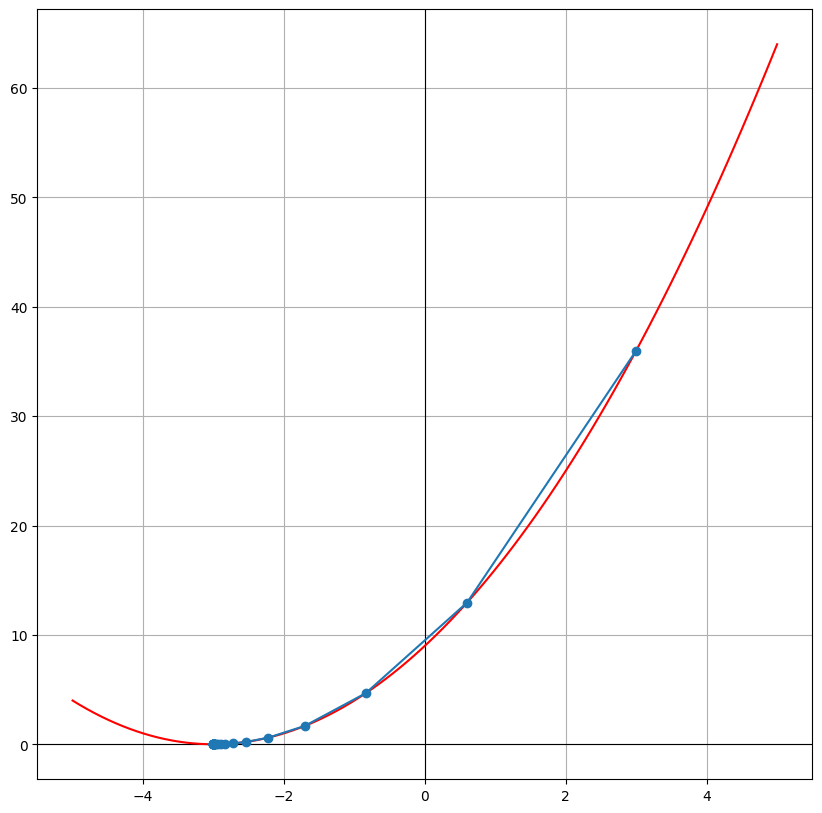

In [6]:
function = (x+3)**2
gradient_descent(
    function=function, start=3.0, learn_rate=0.2, n_iter=50
)